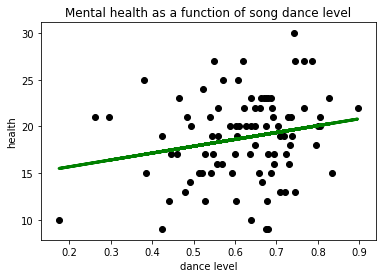

Result with Outlier:
Coefficients (m): 
 [[7.33212189]]
Intercept (b): 
 [14.21503476]
Mean residual sum of squares = 19.750748378634707
RMSE = 4.4441814070349
R2 = 0.04334139493185307
Mean residual sum of squares = 19.75
R2 = 0.04
Mean of residuals = 4.4441814070349
standard deviation of residuals = 4.4441814070349


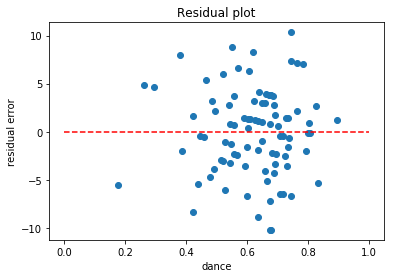

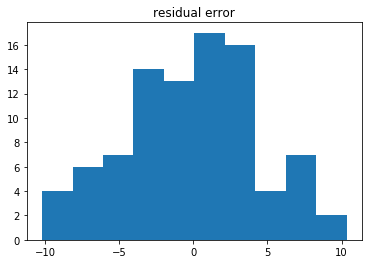

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


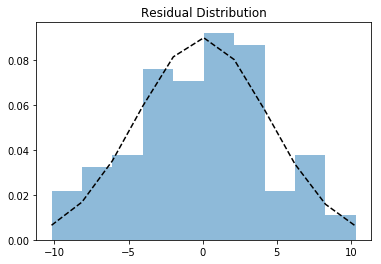

                            OLS Regression Results                            
Dep. Variable:           total_health   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.102
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.357
Time:                        23:13:50   Log-Likelihood:                -678.87
No. Observations:                 230   AIC:                             1368.
Df Residuals:                     225   BIC:                             1385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5983      2.957      5.952      0.0

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('data/master.csv')
dataset = dataset.dropna()

traumaDataset = dataset[dataset['trauma'] == 'Yes']

data = traumaDataset.dance.values.reshape((len(traumaDataset.dance), 1))
CV = traumaDataset.total_health.values.reshape((len(traumaDataset.total_health), 1))

regr = linear_model.LinearRegression()
regr.fit(data,CV)
predicted_results = regr.predict(data)

plt.figure(1)
plt.plot(data, predicted_results, color = 'green', linewidth =3)
plt.scatter(data, CV, color='black')
plt.title('Mental health as a function of song dance level')
plt.xlabel('dance level')
plt.ylabel('health')
plt.show()

print("Result with Outlier:")
print('Coefficients (m): \n', regr.coef_)
print('Intercept (b): \n', regr.intercept_)

MSE = mean_squared_error(CV, predicted_results)
RMSE = math.sqrt(MSE)

R2 = r2_score(CV, predicted_results)

print("Mean residual sum of squares =", MSE)
print("RMSE =", RMSE)
print("R2 =", R2)
print("Mean residual sum of squares = %.2f" % np.mean((regr.predict(data) - CV) **2))
print('R2 = %.2f' % regr.score(data, CV))

residual_error = CV - predicted_results
print("Mean of residuals =", np.std(residual_error))
print("standard deviation of residuals =", np.std(residual_error))

plt.figure(2)
plt.plot((0,1),(0,0), 'r--')
plt.scatter(data, residual_error, label='residual error')
plt.title("Residual plot")
plt.xlabel("dance")
plt.ylabel("residual error")
plt.show()

plt.figure(3)
plt.hist(residual_error)
plt.title("Distribution of residuals")
plt.title("residual error")
plt.show()

plt.figure(4)
n, bins, patches = plt.hist(residual_error, 10, normed=1, alpha = 0.5)
y_pdf = P.normpdf(bins, np.mean(residual_error), np.std(residual_error))
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.title("Residual Distribution")
plt.show()

x = dataset[['energy', 'tempo', 'dance', 'valence']]
y = dataset['total_health']

x = sm.add_constant(x)
allVars = sm.OLS(y,x).fit()

print(allVars.summary())